In [1]:
import sys
sys.path.append("../")

In [2]:
from libraries.dataManipulation import *
from libraries.gridManipulation import *
import seaborn
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#GRID CONFIGURATION IS DECLARED
o_x = 5000
o_y = -10000
o = (o_x,o_y)

patch_width = 1000
patch_height = 1000
patch_size = (patch_width, patch_height)

total_patches = (67,14)
abs_total_patches = total_patches[0]*total_patches[1]

grid_angle = 0

In [4]:
#GRID IS CREATED USING CONFIG
grid = create_grid(o, patch_size, total_patches, grid_angle)

trying to fetch: /storage/surfsara/ProRail_USE_LL_data/ehv/background_images/EHV.Perron2.1_multisensor.png
background fetched. Accessible as <this-object>.bg


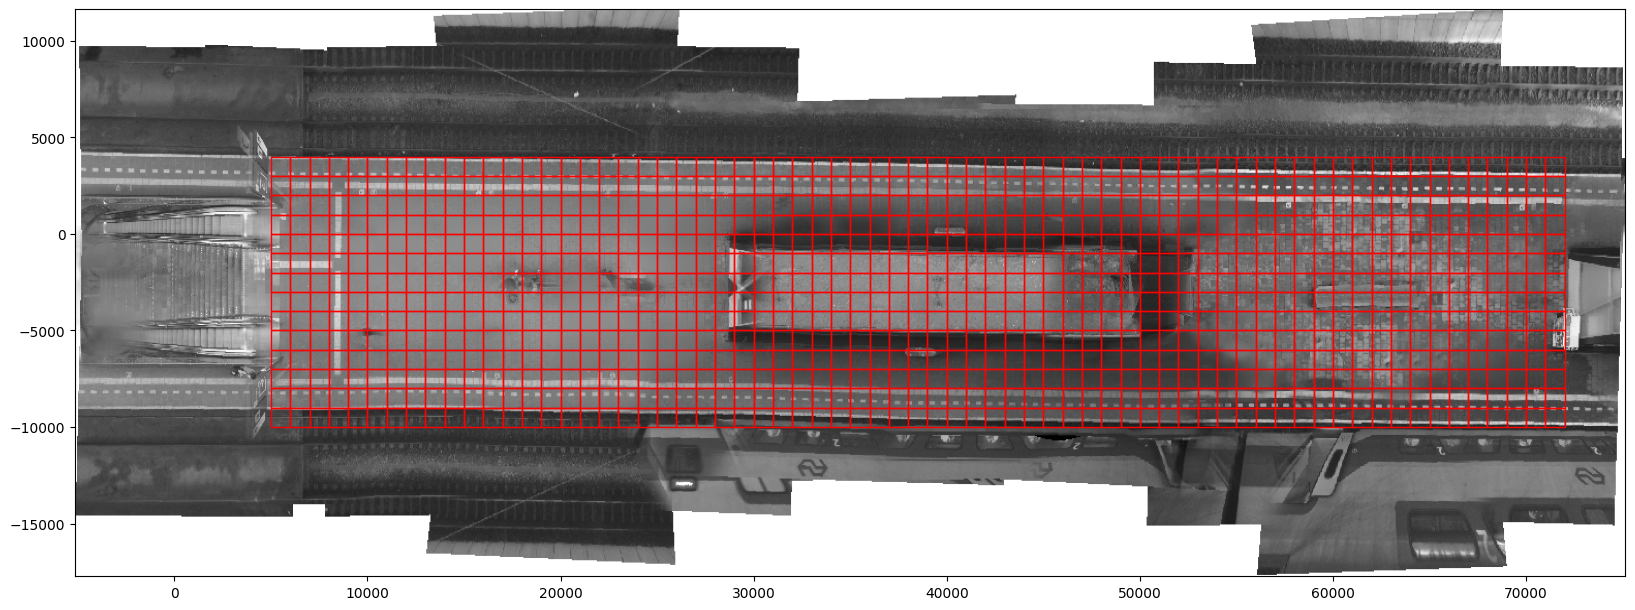

In [5]:
#GRID IS PLOTTED ON STATION
plot_grid(grid, 'ehv')

In [6]:
clean_export_paths_and_names = ['clean_results/onboarding_no_train.csv', 'clean_results/onboarding_top.csv', 'clean_results/onboarding_bottom.csv', 'clean_results/onboarding_both.csv', 'clean_results/offboarding.csv']

In [7]:
data_off = pd.read_csv(clean_export_paths_and_names[4], header=None)
data_top = pd.read_csv(clean_export_paths_and_names[1], header=None)
data_bottom = pd.read_csv(clean_export_paths_and_names[2], header=None)
data_both = pd.read_csv(clean_export_paths_and_names[3], header=None)
data_no = pd.read_csv(clean_export_paths_and_names[0], header=None)

In [8]:
dissapear_off = (data_off[938].to_numpy())[:-1]
dissapear_top = (data_top[938].to_numpy())[:-1]
dissapear_bottom = (data_bottom[938].to_numpy())[:-1]
dissapear_both = (data_both[938].to_numpy())[:-1]
dissapear_no = (data_no[938].to_numpy())[:-1]

In [9]:
final_off_l = np.flipud(np.transpose(np.split(dissapear_off, 67)))
final_top_l = np.flipud(np.transpose(np.split(dissapear_top, 67)))
final_bottom_l = np.flipud(np.transpose(np.split(dissapear_bottom, 67)))
final_both_l = np.flipud(np.transpose(np.split(dissapear_both, 67)))
final_no_l = np.flipud(np.transpose(np.split(dissapear_no, 67)))

In [10]:
diag_off = pd.Series(np.diag(data_off), index=[data_off.index, data_off.columns])
diag_top = pd.Series(np.diag(data_top), index=[data_top.index, data_top.columns])
diag_bottom = pd.Series(np.diag(data_bottom), index=[data_bottom.index, data_bottom.columns])
diag_both = pd.Series(np.diag(data_both), index=[data_both.index, data_both.columns])
diag_no = pd.Series(np.diag(data_no), index=[data_no.index, data_no.columns])

In [11]:
diag_off_no_leave = diag_off[:-1]
diag_top_no_leave = diag_top[:-1]
diag_bottom_no_leave = diag_bottom[:-1]
diag_both_no_leave = diag_both[:-1]
diag_no_no_leave = diag_no[:-1]

In [12]:
final_off_nl = np.flipud(np.transpose(np.split(diag_off_no_leave, 67)))
final_top_nl = np.flipud(np.transpose(np.split(diag_top_no_leave, 67)))
final_bottom_nl = np.flipud(np.transpose(np.split(diag_bottom_no_leave, 67)))
final_both_nl = np.flipud(np.transpose(np.split(diag_both_no_leave, 67)))
final_no_nl = np.flipud(np.transpose(np.split(diag_no_no_leave, 67)))

[Text(0.5, 1.0, 'Probability of staying in the same zone for onboarding pedestrians with no trains')]

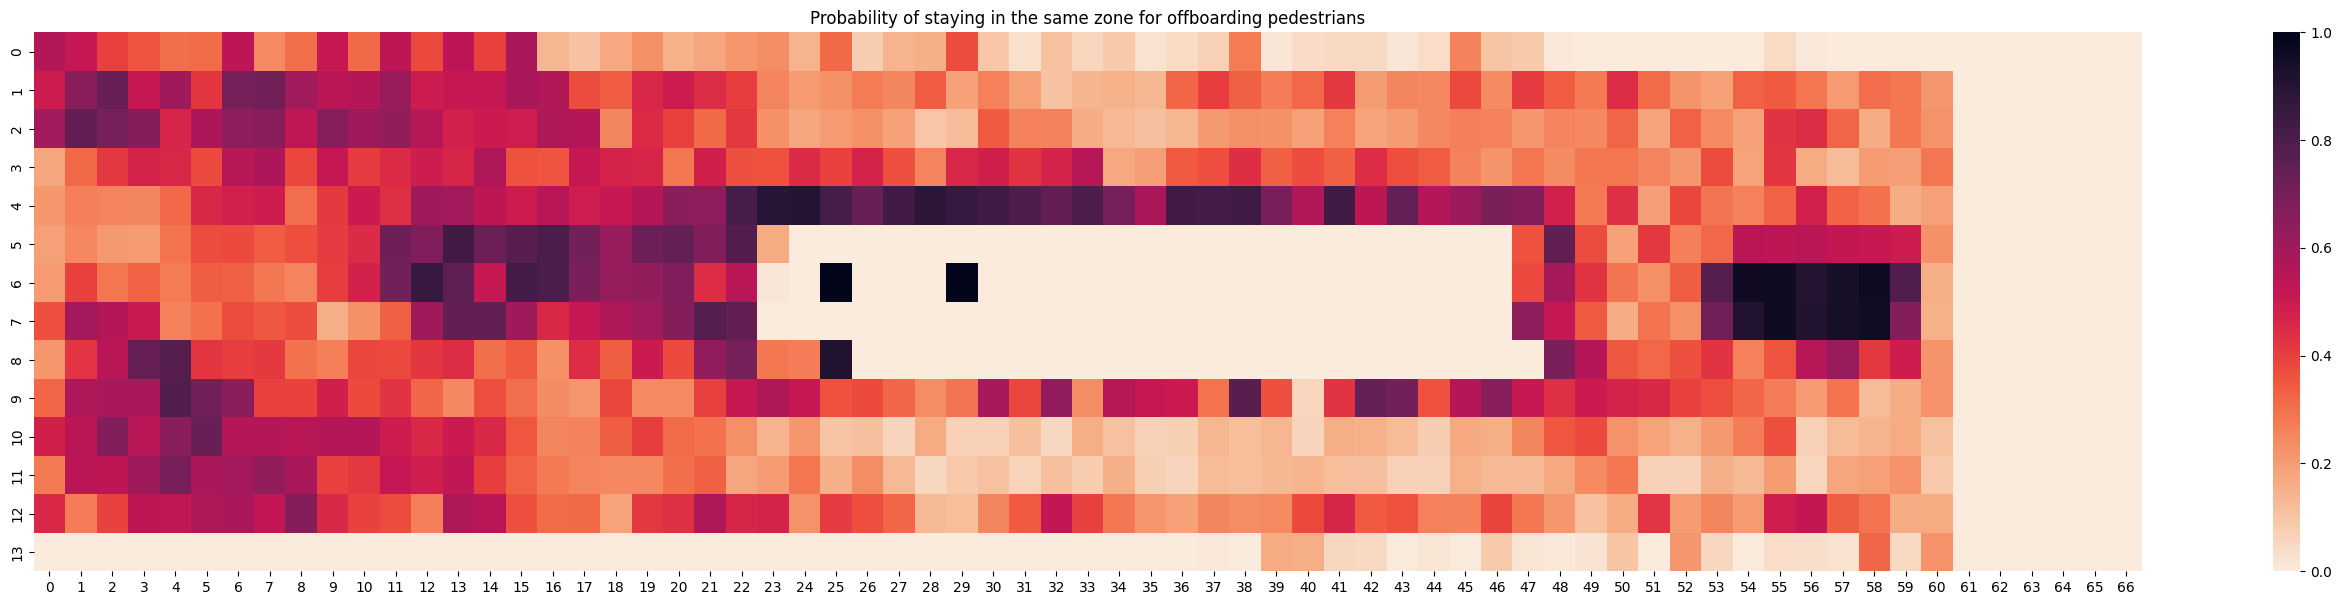

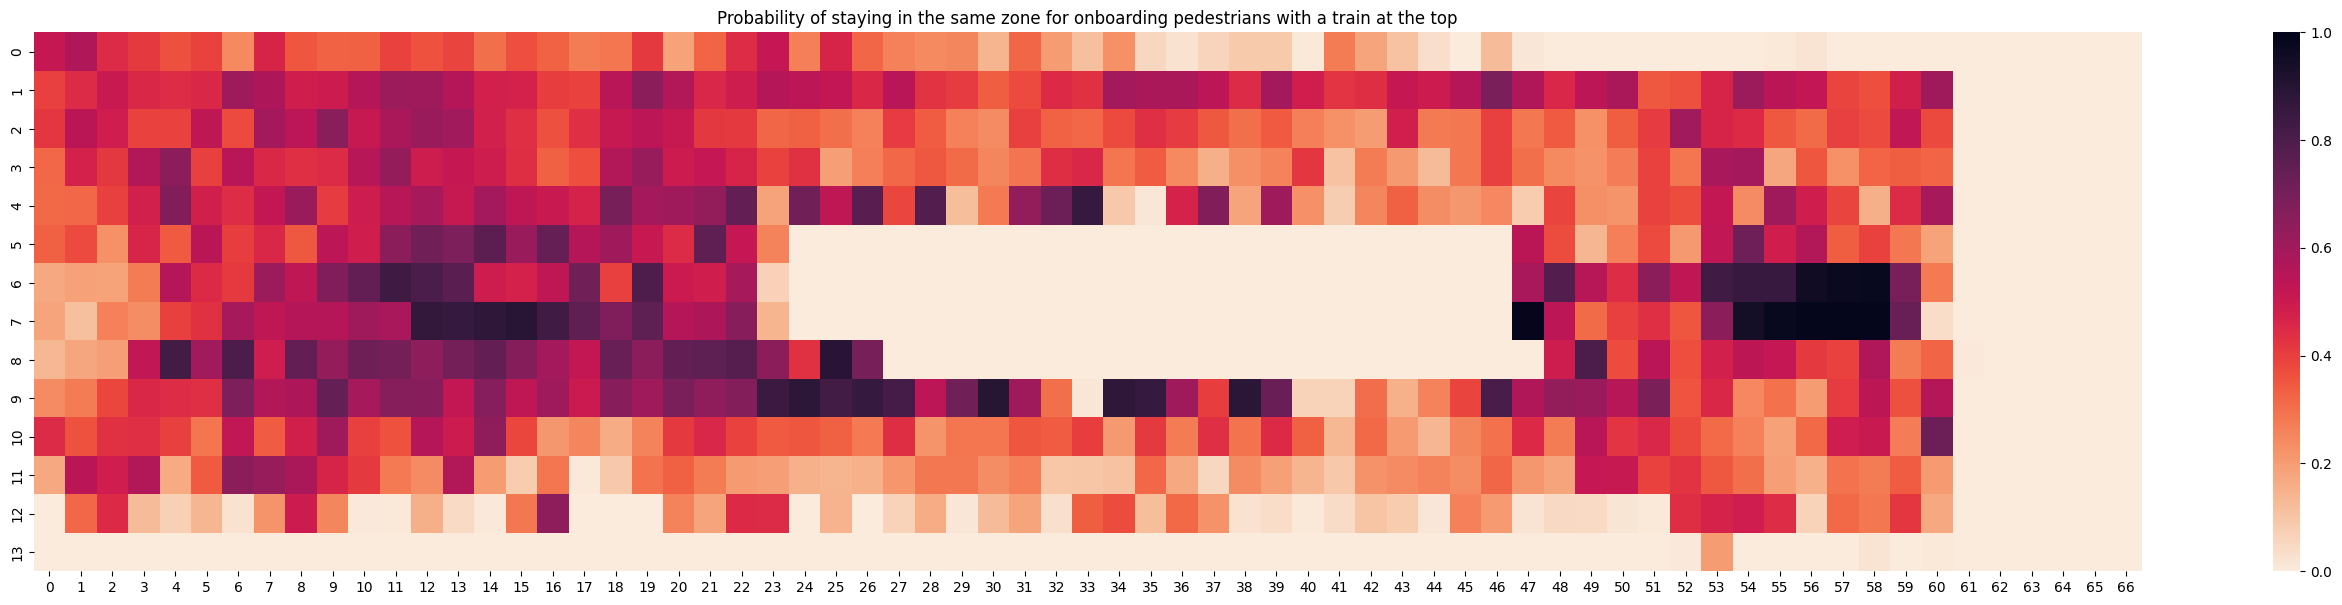

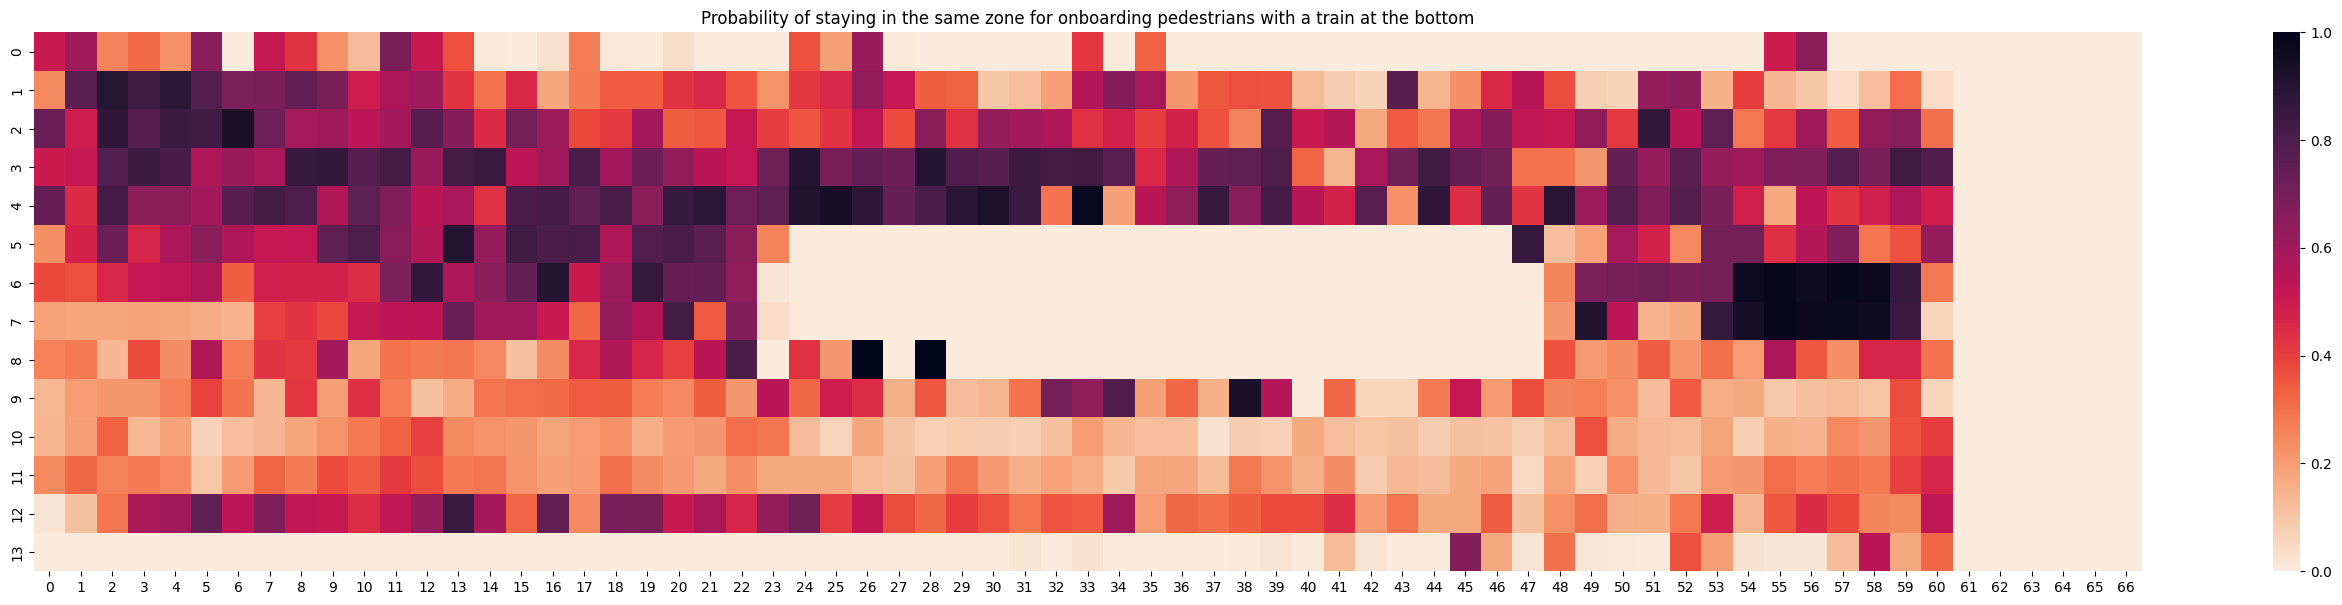

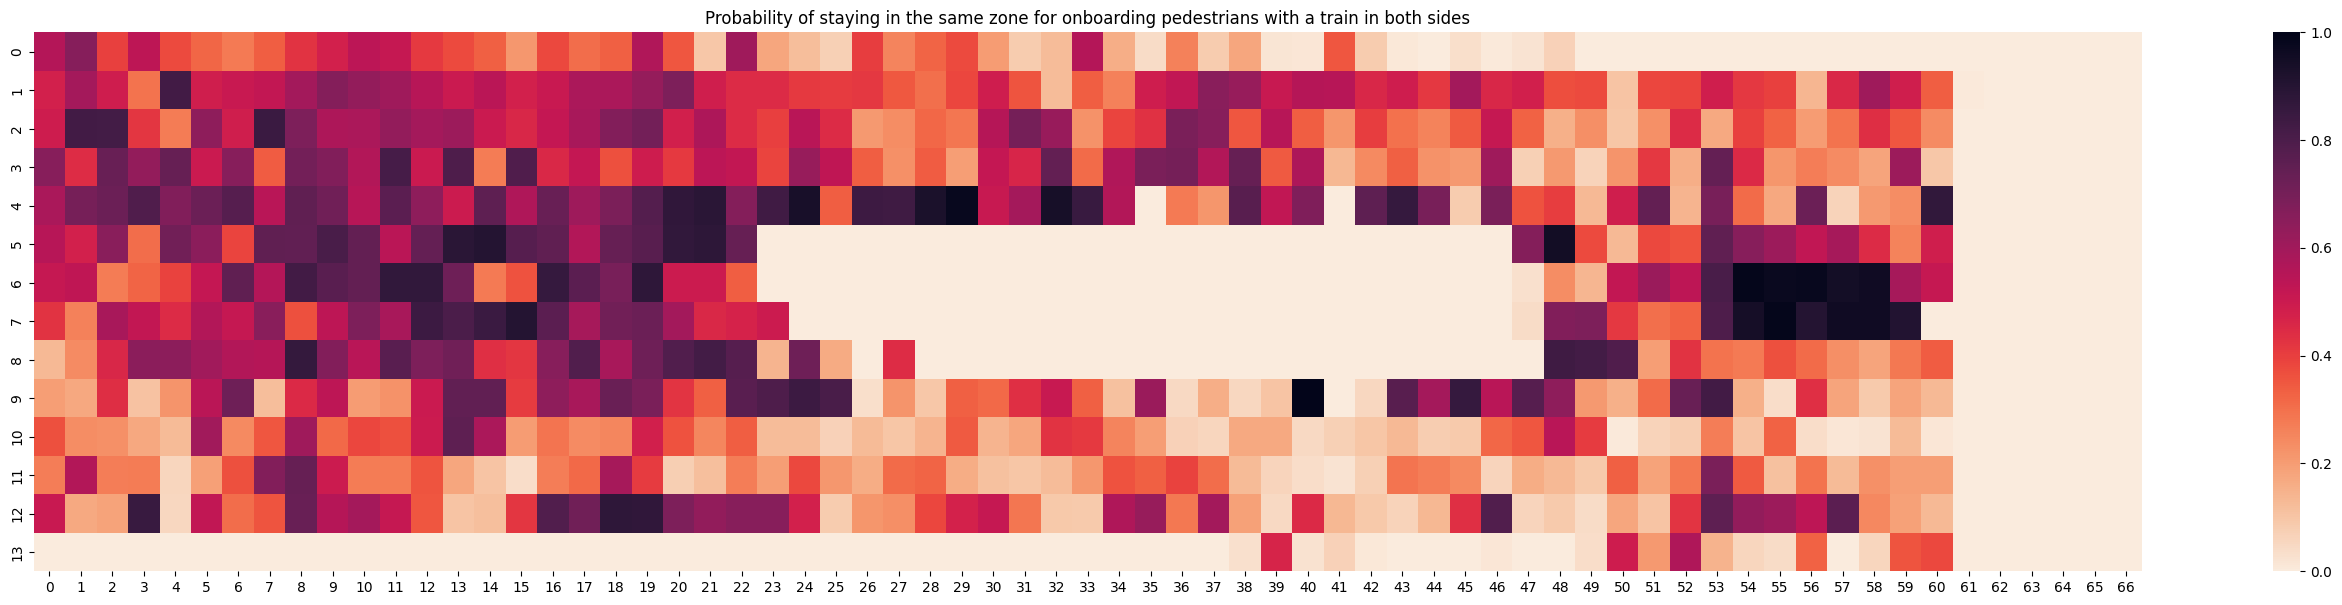

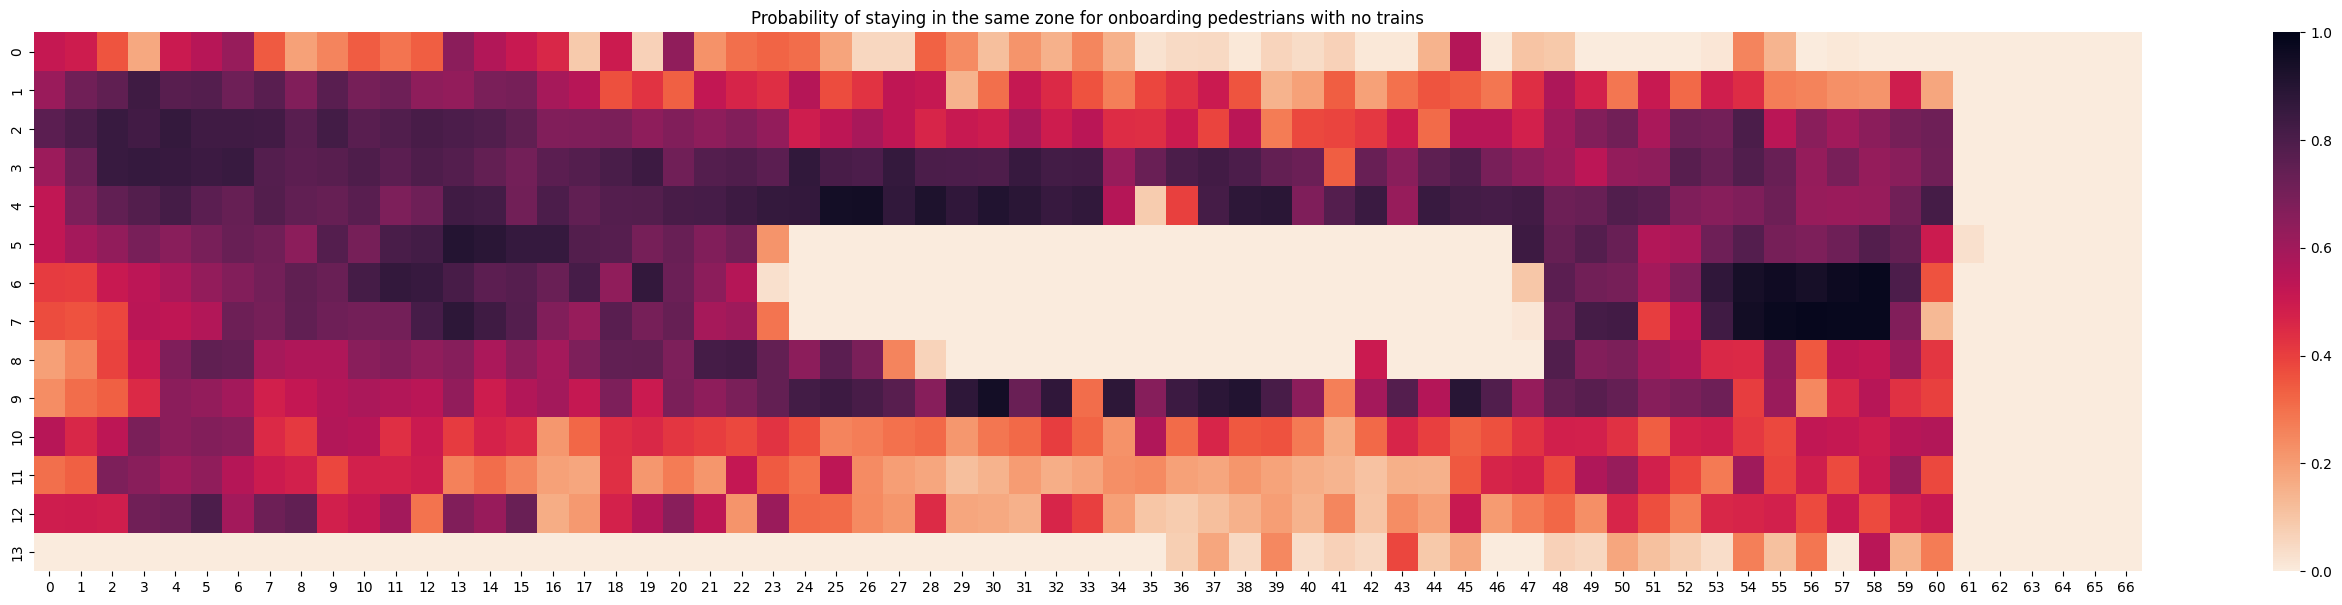

In [13]:
fig1, ax_off_nl = plt.subplots(figsize=(34,7))
fig1, ax_top_nl = plt.subplots(figsize=(34,7))
fig1, ax_bottom_nl = plt.subplots(figsize=(34,7))
fig1, ax_both_nl = plt.subplots(figsize=(34,7))
fig1, ax_no_nl = plt.subplots(figsize=(34,7))
cmap = seaborn.cm.rocket_r
seaborn.heatmap(final_off_nl, cmap=cmap, ax=ax_off_nl, vmin=0, vmax=1).set(title='Probability of staying in the same zone for offboarding pedestrians')
seaborn.heatmap(final_top_nl, cmap=cmap, ax=ax_top_nl, vmin=0, vmax=1).set(title='Probability of staying in the same zone for onboarding pedestrians with a train at the top')
seaborn.heatmap(final_bottom_nl, cmap=cmap, ax=ax_bottom_nl, vmin=0, vmax=1).set(title='Probability of staying in the same zone for onboarding pedestrians with a train at the bottom')
seaborn.heatmap(final_both_nl, cmap=cmap, ax=ax_both_nl, vmin=0, vmax=1).set(title='Probability of staying in the same zone for onboarding pedestrians with a train in both sides')
seaborn.heatmap(final_no_nl, cmap=cmap, ax=ax_no_nl, vmin=0, vmax=1).set(title='Probability of staying in the same zone for onboarding pedestrians with no trains')

[Text(0.5, 1.0, 'Probability of dissapearing for onboarding pedestrians with no trains')]

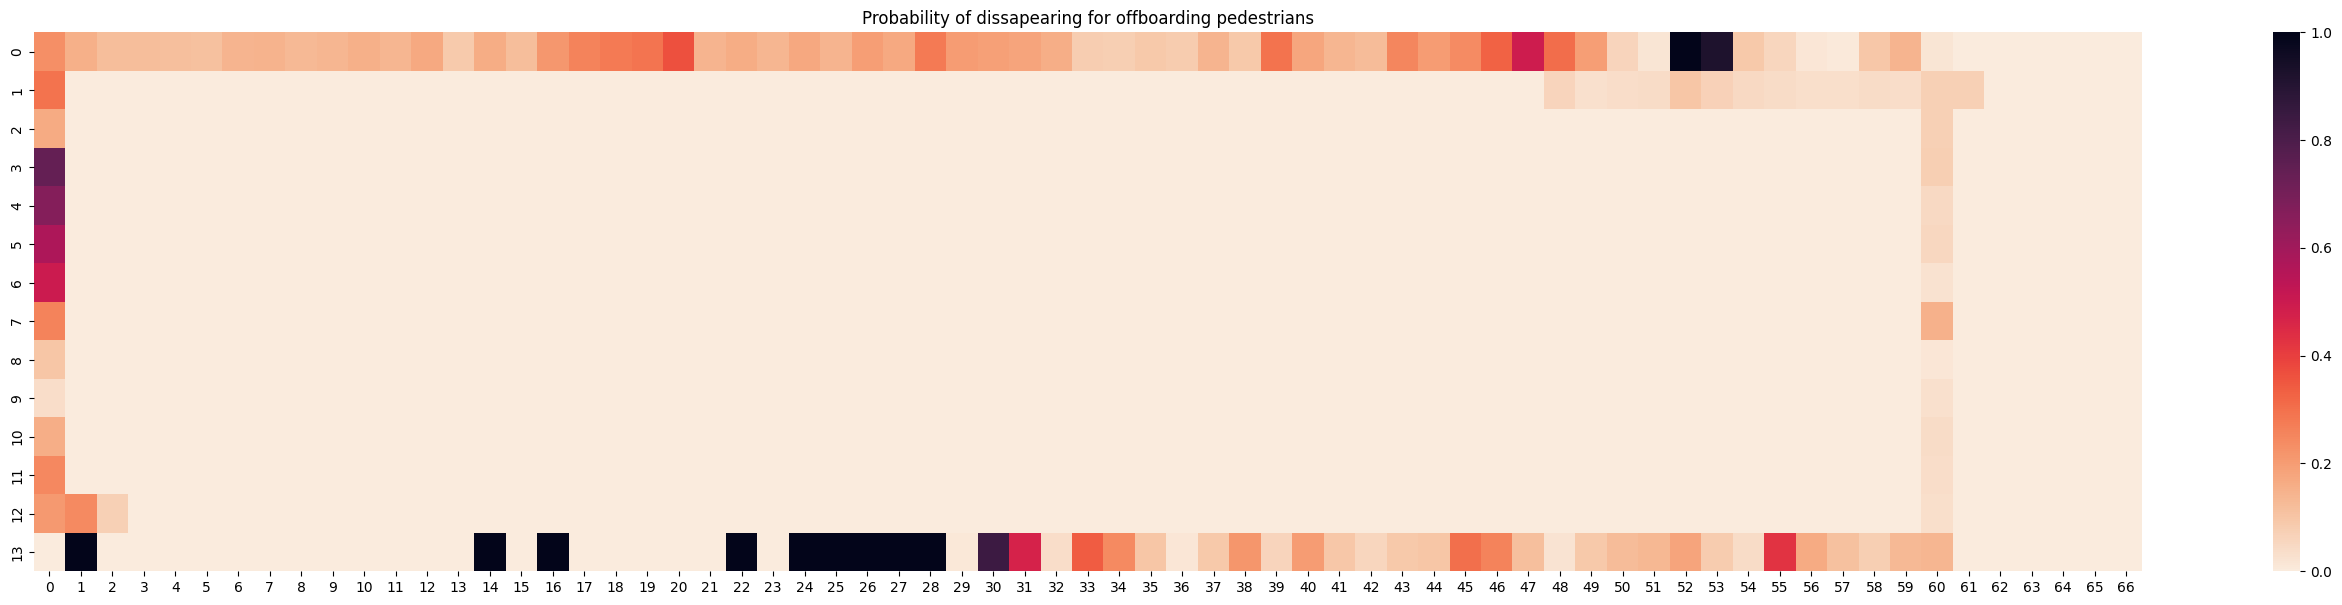

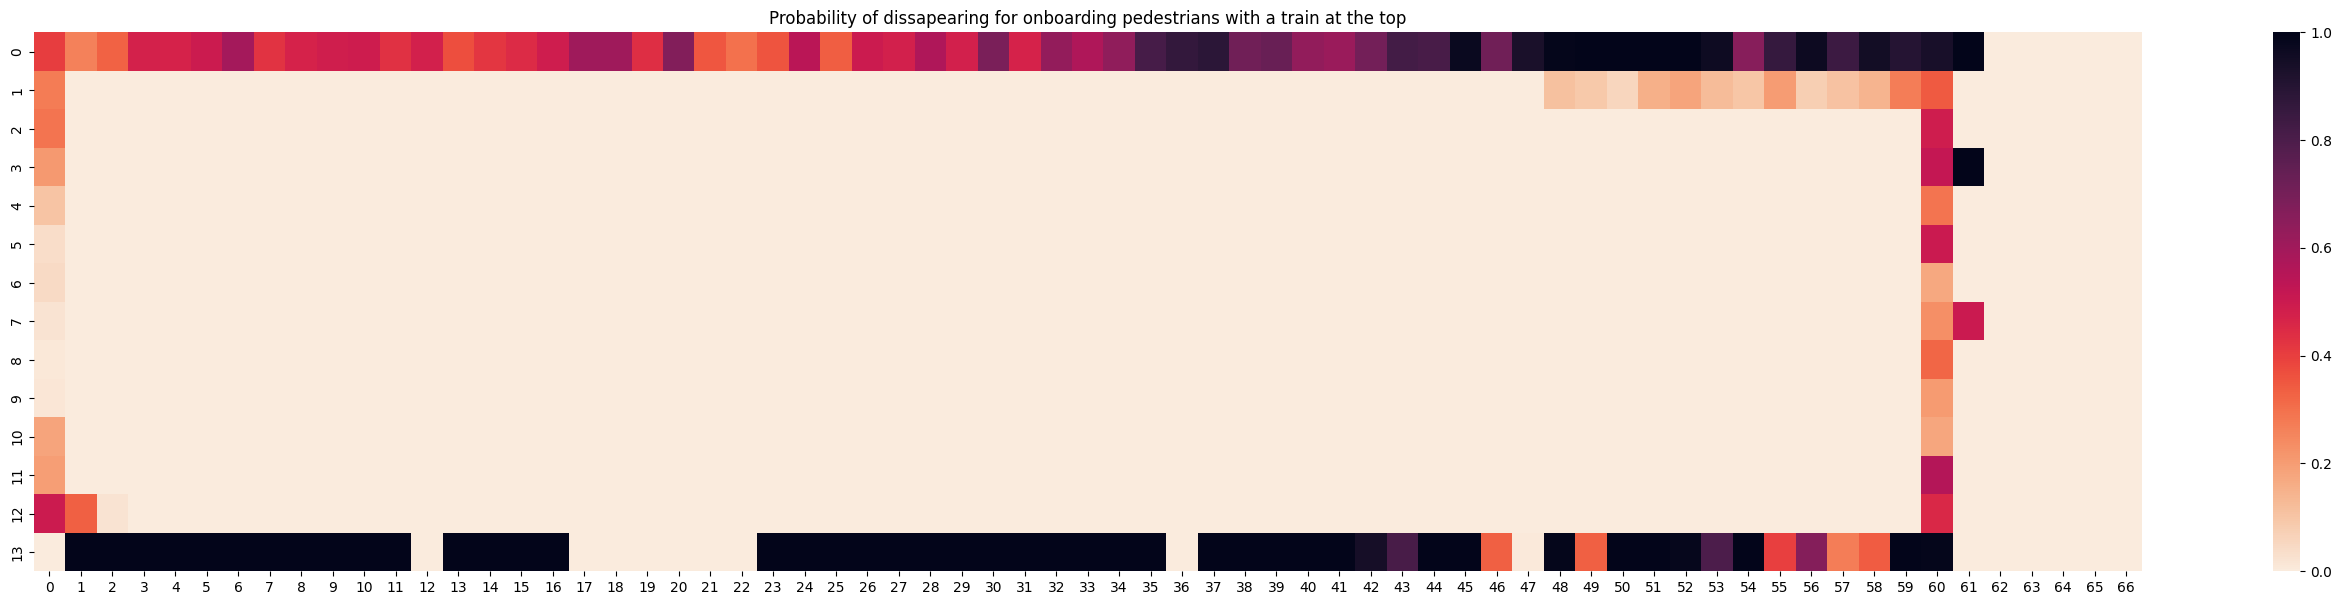

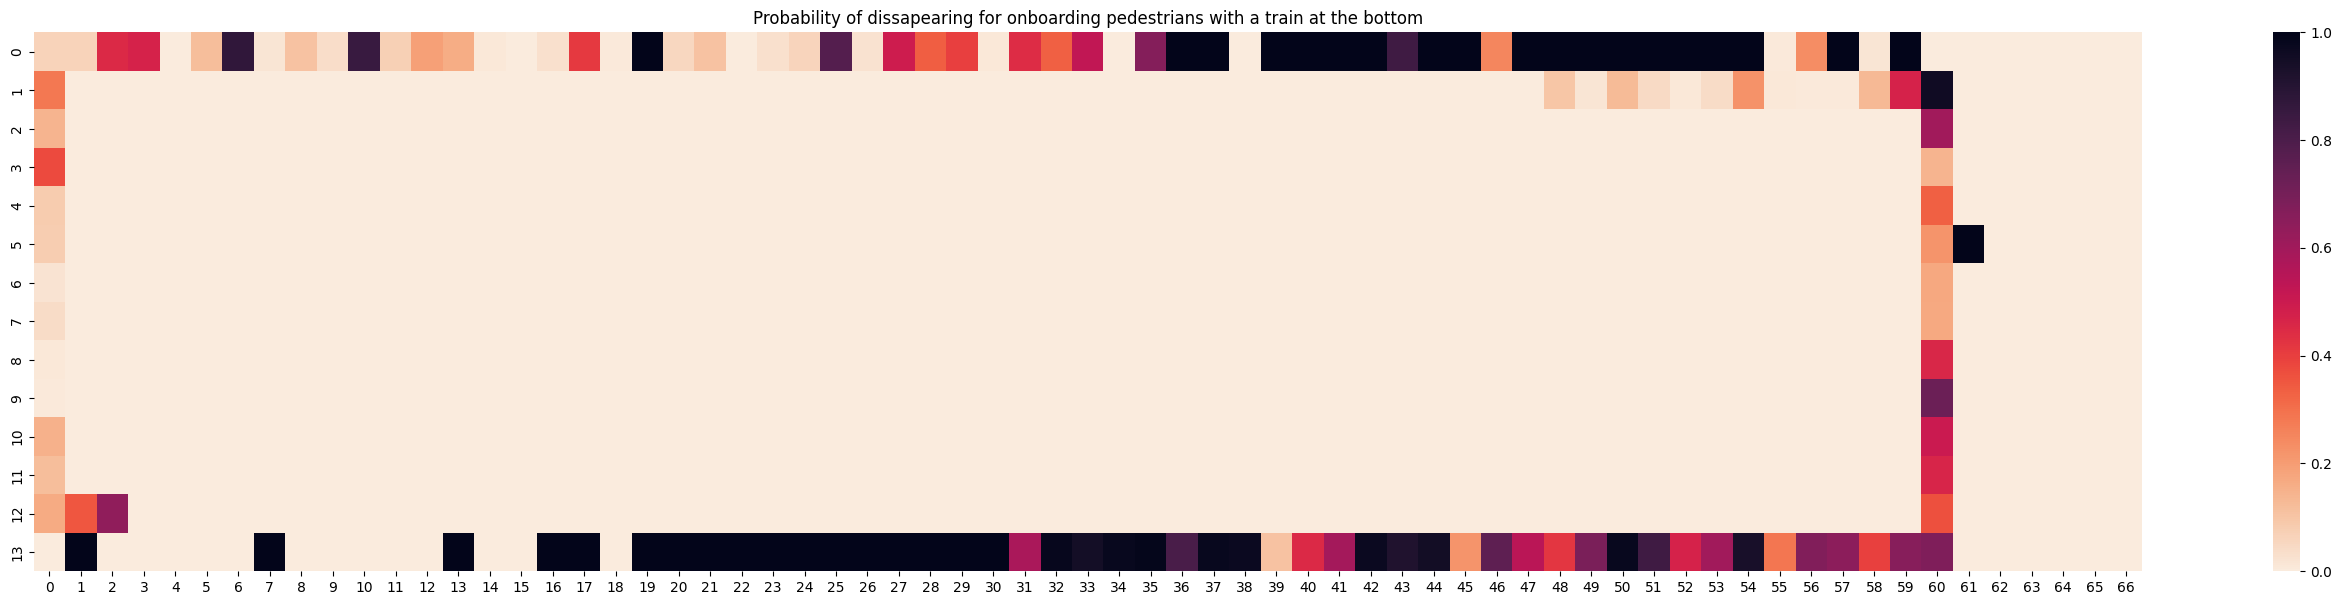

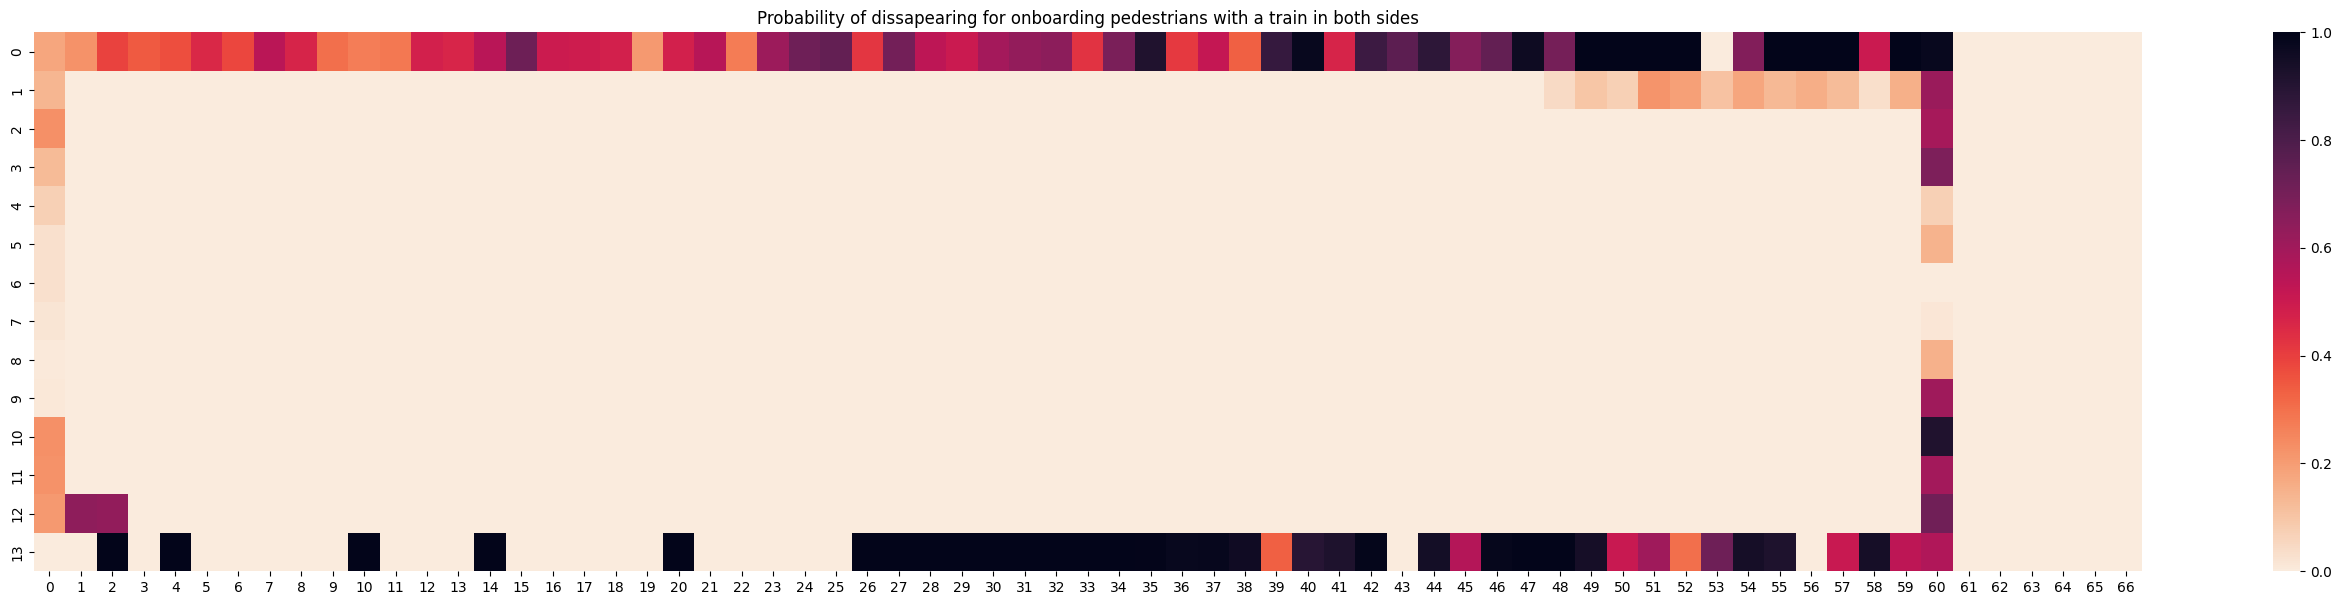

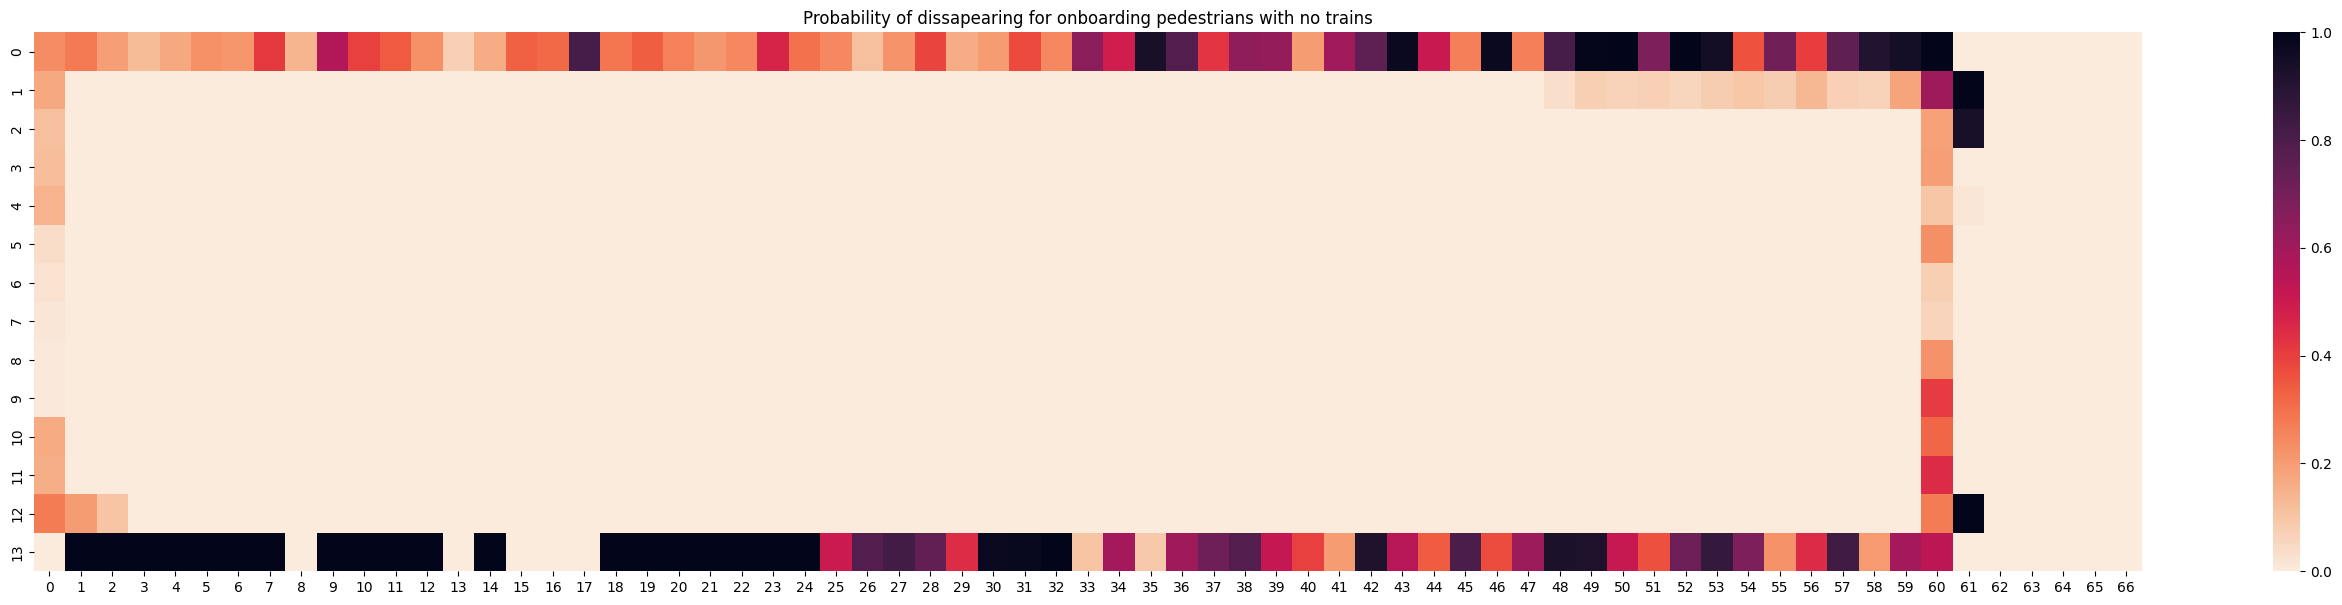

In [14]:
fig2, ax_off_l = plt.subplots(figsize=(34,7))
fig2, ax_top_l = plt.subplots(figsize=(34,7))
fig2, ax_bottom_l = plt.subplots(figsize=(34,7))
fig2, ax_both_l = plt.subplots(figsize=(34,7))
fig2, ax_no_l = plt.subplots(figsize=(34,7))
cmap = seaborn.cm.rocket_r
seaborn.heatmap(final_off_l, cmap=cmap, ax=ax_off_l, vmin=0, vmax=1).set(title='Probability of dissapearing for offboarding pedestrians')
seaborn.heatmap(final_top_l, cmap=cmap, ax=ax_top_l, vmin=0, vmax=1).set(title='Probability of dissapearing for onboarding pedestrians with a train at the top')
seaborn.heatmap(final_bottom_l, cmap=cmap, ax=ax_bottom_l, vmin=0, vmax=1).set(title='Probability of dissapearing for onboarding pedestrians with a train at the bottom')
seaborn.heatmap(final_both_l, cmap=cmap, ax=ax_both_l, vmin=0, vmax=1).set(title='Probability of dissapearing for onboarding pedestrians with a train in both sides')
seaborn.heatmap(final_no_l, cmap=cmap, ax=ax_no_l, vmin=0, vmax=1).set(title='Probability of dissapearing for onboarding pedestrians with no trains')